In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
import numpy as np
from utils.visualization import plot_prediction_vs_real
from experiments.graphs.graph_experiments import get_pignn_config, get_dataset, create_data_loaders
from architecture.pignn.pignn import FlowPIGNN
from architecture.pignn.deconv import DeConvNet, FCDeConvNet
import os
import json

# Evaluation methods for non-temporal methods
def load_config(config_path):
    with open(config_path, 'r') as f:
        config = json.load(f)
    return config

criterion = torch.nn.MSELoss()

def calculate_test_loss(model, test_loader, plot_examples=True):
    with torch.no_grad():
        test_losses = []
        for i, batch in enumerate(test_loader):
            batch = batch.to(device)
            x = batch.x.to(device).float()
            pos = batch.pos.to(device).float()
            ef = batch.edge_attr.to(device).float()
            gf = batch.global_feats.to(device).float()
            batch_size = gf.size(0)

            if isinstance(model, FCDeConvNet):
                x_cat = torch.cat((
                    x.reshape(batch_size, -1),
                    pos.reshape(batch_size, -1),
                    ef.reshape(batch_size, -1),
                    gf.reshape(batch_size, -1)
                ), dim=-1)

                pred = model(x_cat).float()
                target = batch.y.to(device).reshape(-1, pred.size(1))
            else:
                pred = model(batch, torch.cat((x, pos), dim=-1), ef, gf)
                target = batch.y.to(device).reshape(-1, pred.size(1))
            test_loss = criterion(pred, target)

            if plot_examples:
                predictions = [
                    pred[0, :].reshape(128, 128).cpu(),
                    pred[16, :].reshape(128, 128).cpu(),
                    pred[32, :].reshape(128, 128).cpu()
                ]

                targets = [
                    target[0, :].reshape(128, 128).cpu(),
                    target[16, :].reshape(128, 128).cpu(),
                    target[32, :].reshape(128, 128).cpu()
                ]
                for j in range(3):
                    plot_prediction_vs_real(predictions[j], targets[j], number=3*i+j)
            test_losses.append(test_loss.item())

        return np.mean(test_losses), np.std(test_losses)

def evaluate_model(experiment_dir):
    config_path = os.path.join(experiment_dir, 'config.json')
    model_config = get_pignn_config()
    config = load_config(config_path)
    model = FlowPIGNN(**model_config, deconv_model=DeConvNet(1, [64, 128, 256, 1], output_size=128)).to(device) if config['use_graph'] else FCDeConvNet(212, 650, 656, 500).to(device)
    model_path = os.path.join(experiment_dir, 'pignn_best.pt')
    model.load_state_dict(torch.load(model_path))

    dataset = get_dataset(config['dataset_dirs'], False, 1)
    _, _, test_loader = create_data_loaders(dataset, config['batch_size'], 1)
    return calculate_test_loss(model, test_loader)

In [3]:
# Evaluate non-temporal methods
base_dir = "results/windmaps"

for experiment_name in os.listdir(base_dir):
    experiment_dir = os.path.join(base_dir, experiment_name)

    if os.path.isdir(experiment_dir):  # Check if it's a directory
        try:
            mse, std = evaluate_model(experiment_dir)
            print(f"Loaded model from {experiment_name} has MSE on test set: {mse} +- {std}")
        except Exception as e:
            print(f"Failed to load model from {experiment_name}: {e}")

C:\Users\Matth\AppData\Local\Temp\ipykernel_22628\2679822125.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))
D:\AI2P\repo\

KeyboardInterrupt: 

C:\Users\Matth\AppData\Local\Temp\ipykernel_6716\2679822125.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))
D:\AI2P\repo\e

Loaded datasets, 2400 samples


D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


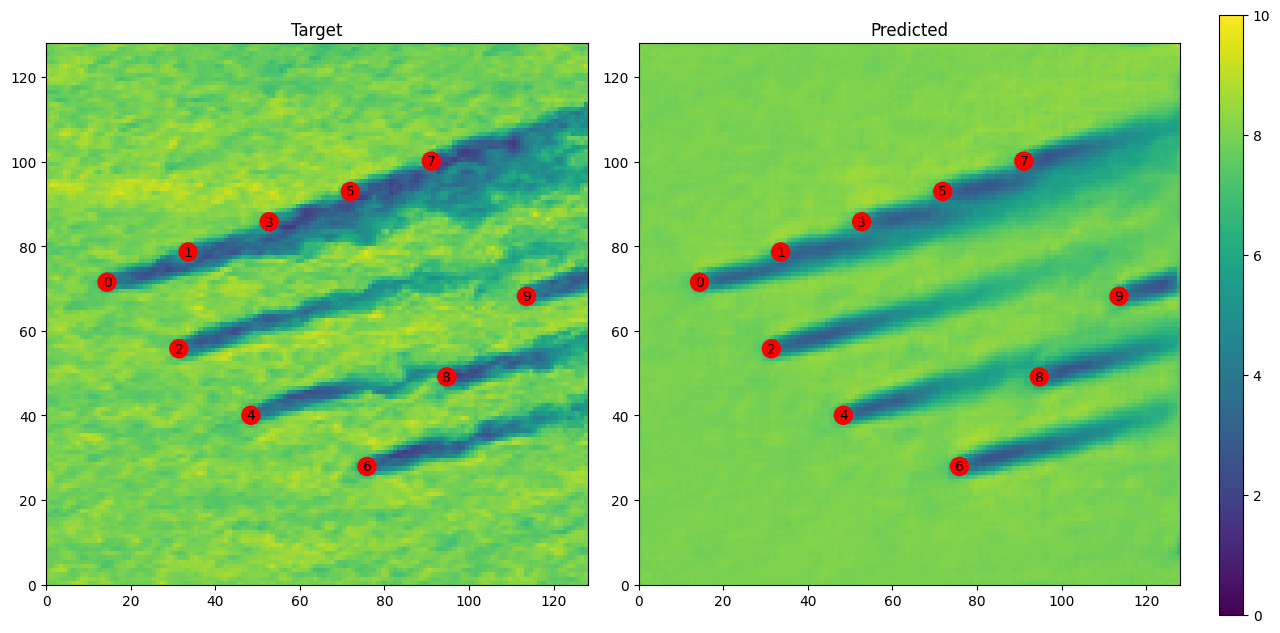

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


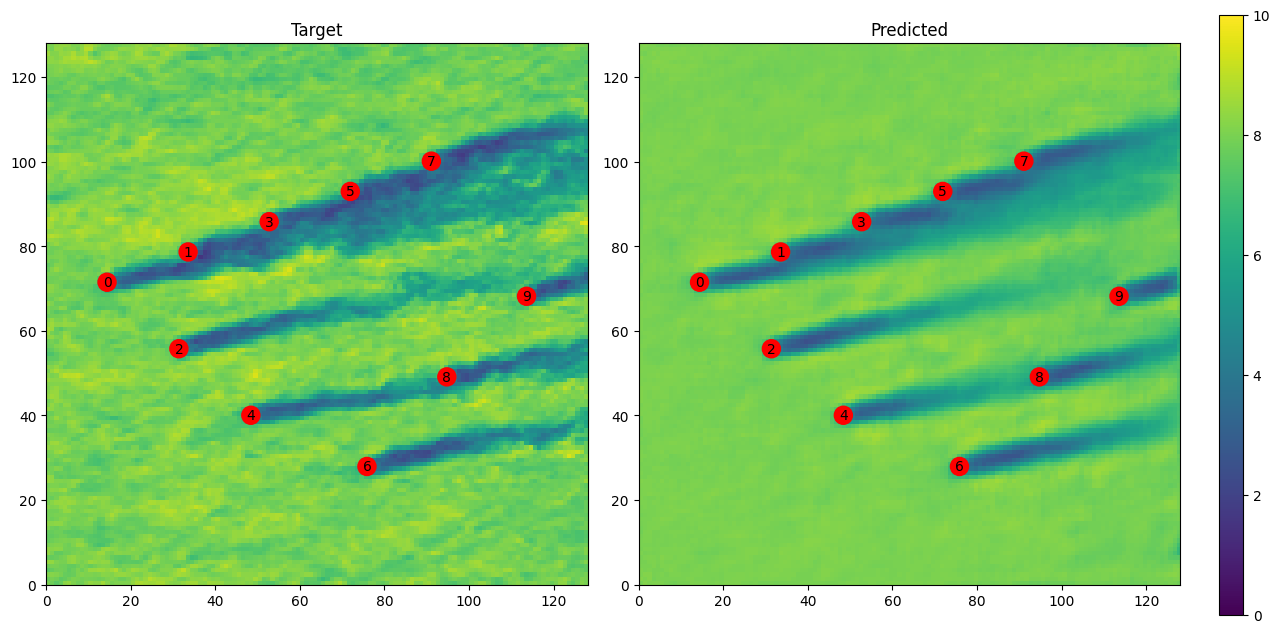

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


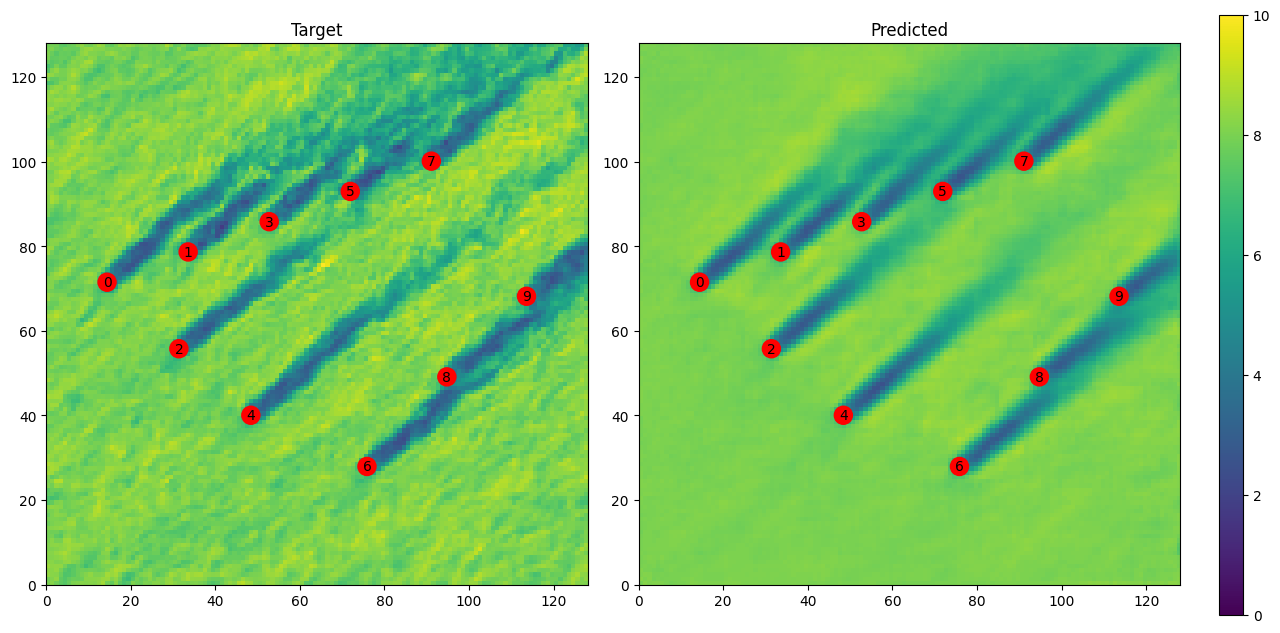

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


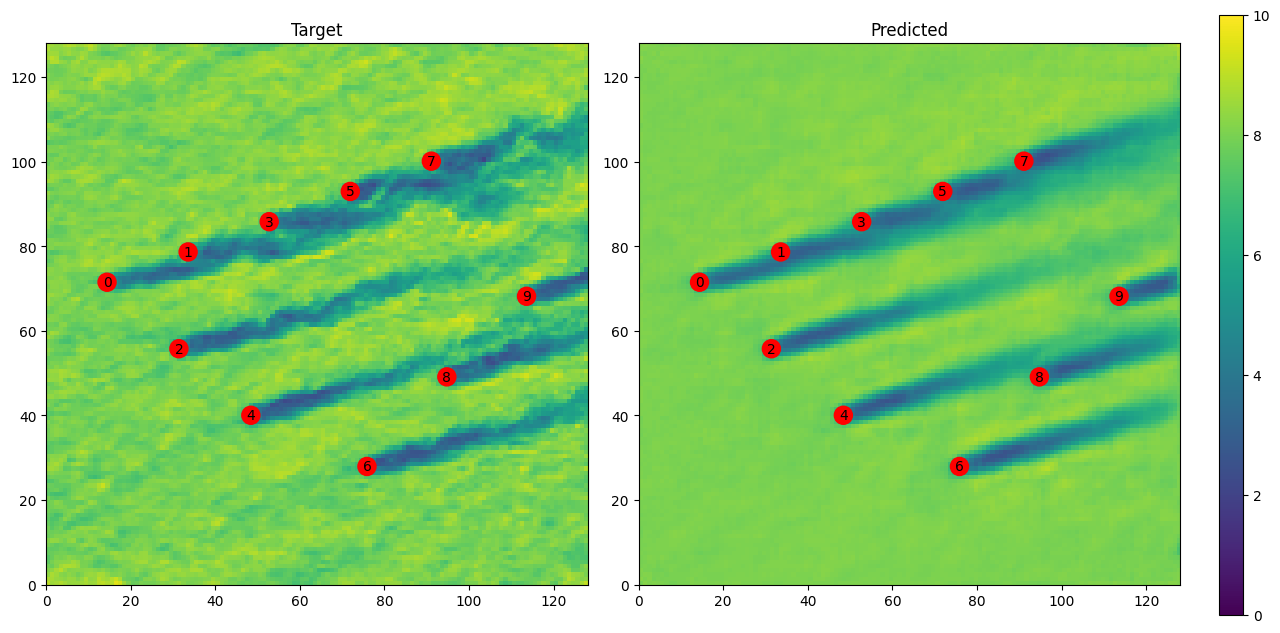

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


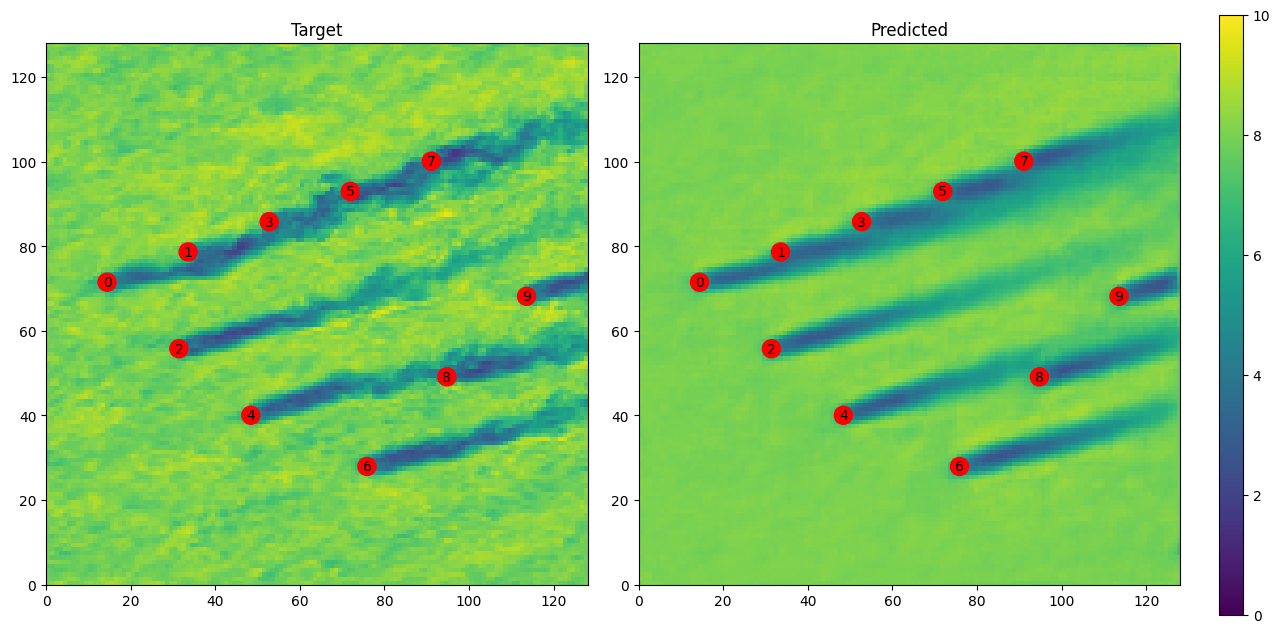

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


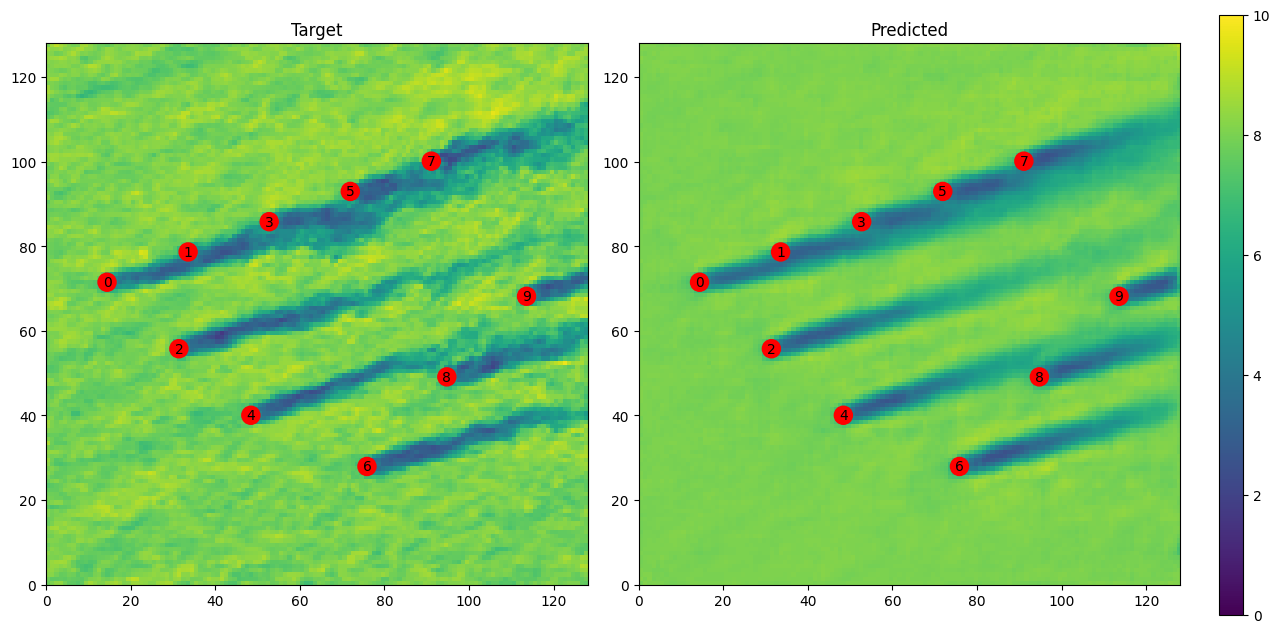

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


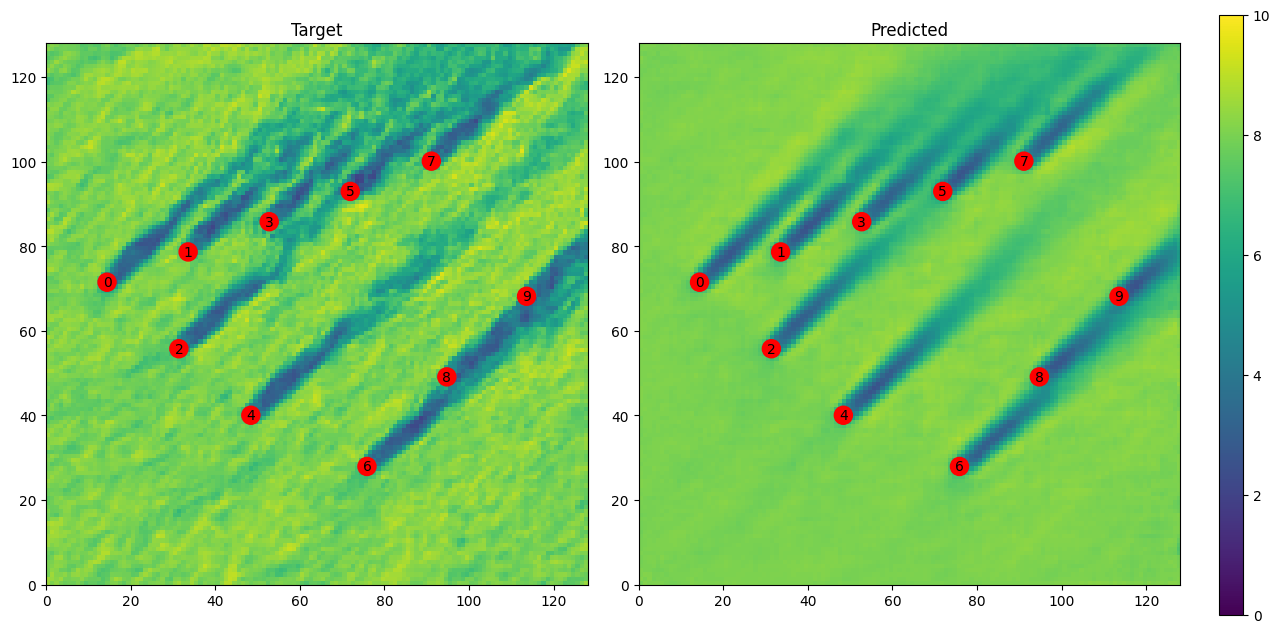

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


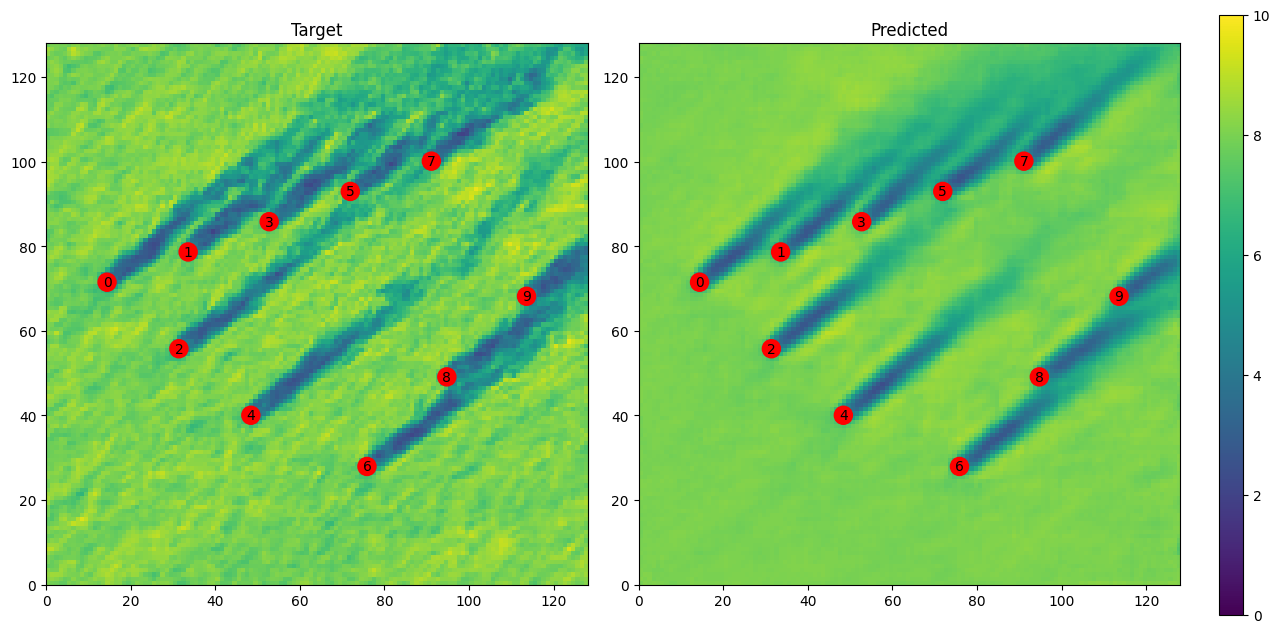

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


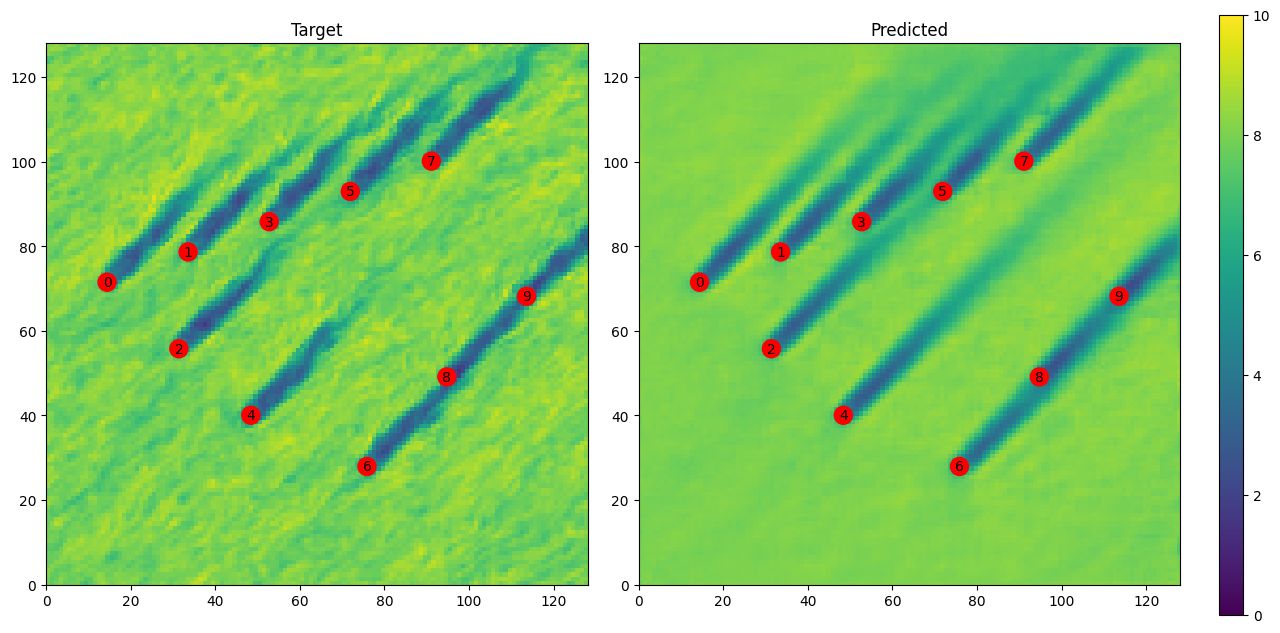

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


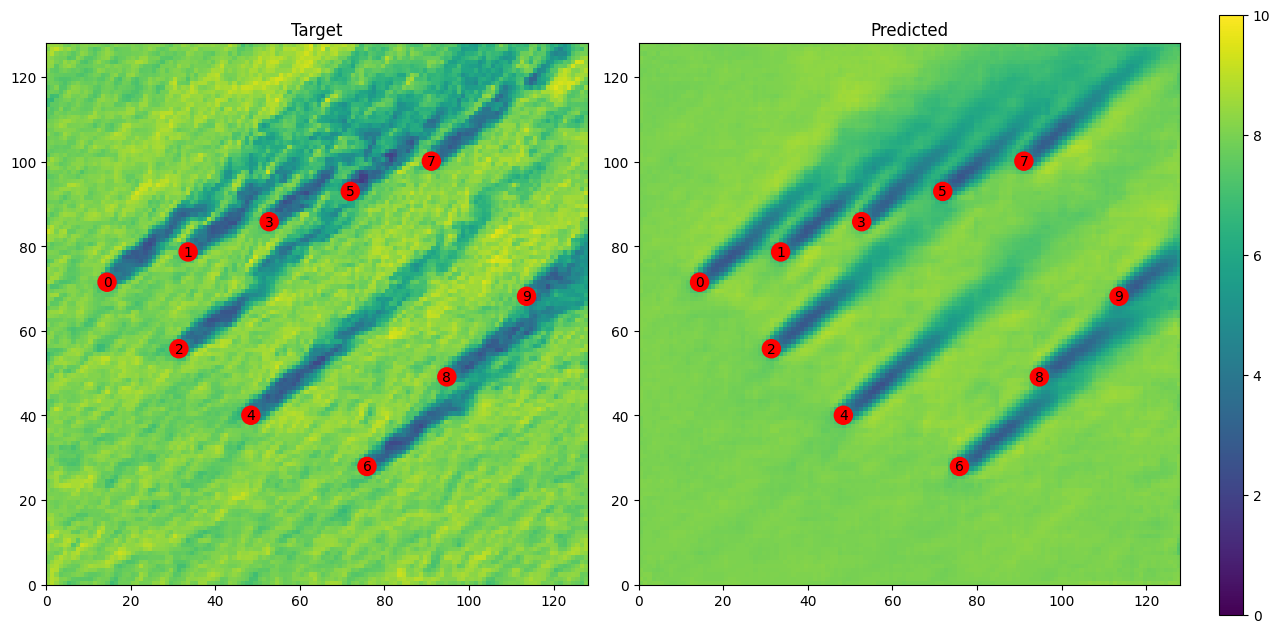

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


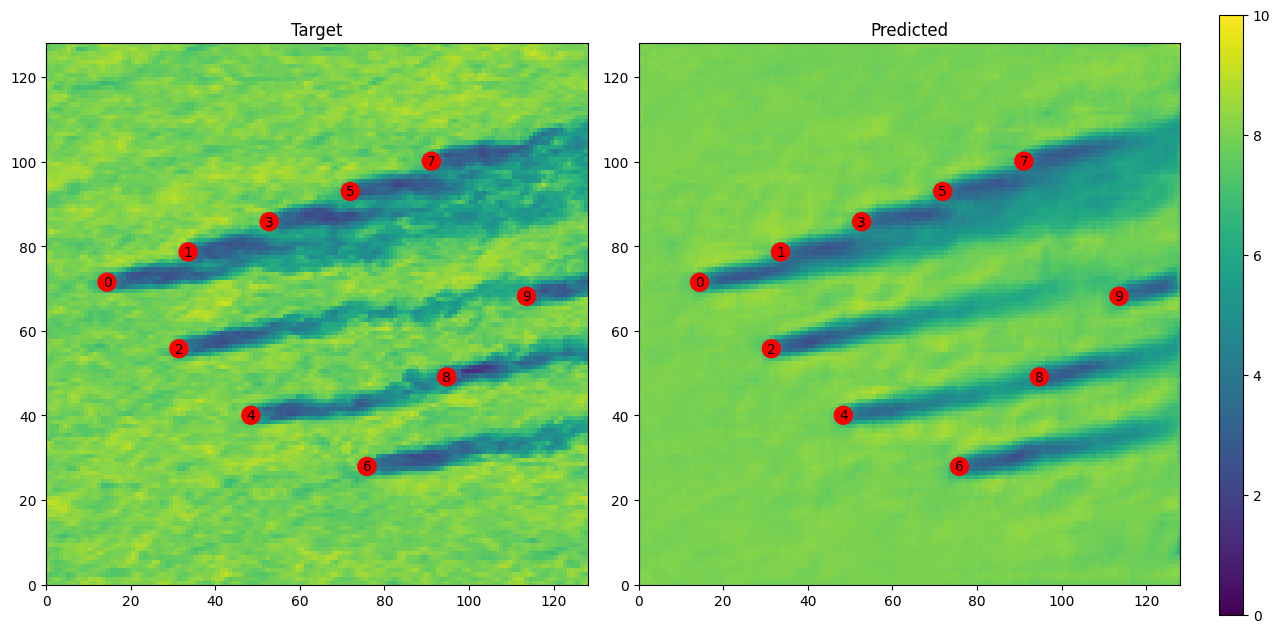

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


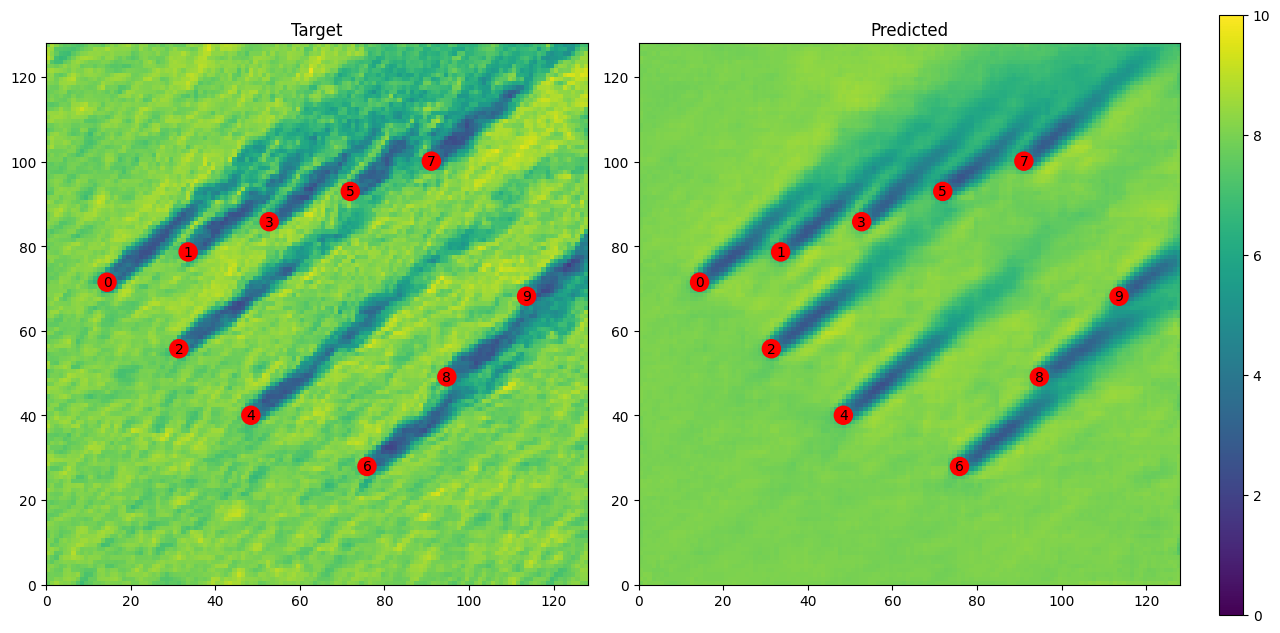

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


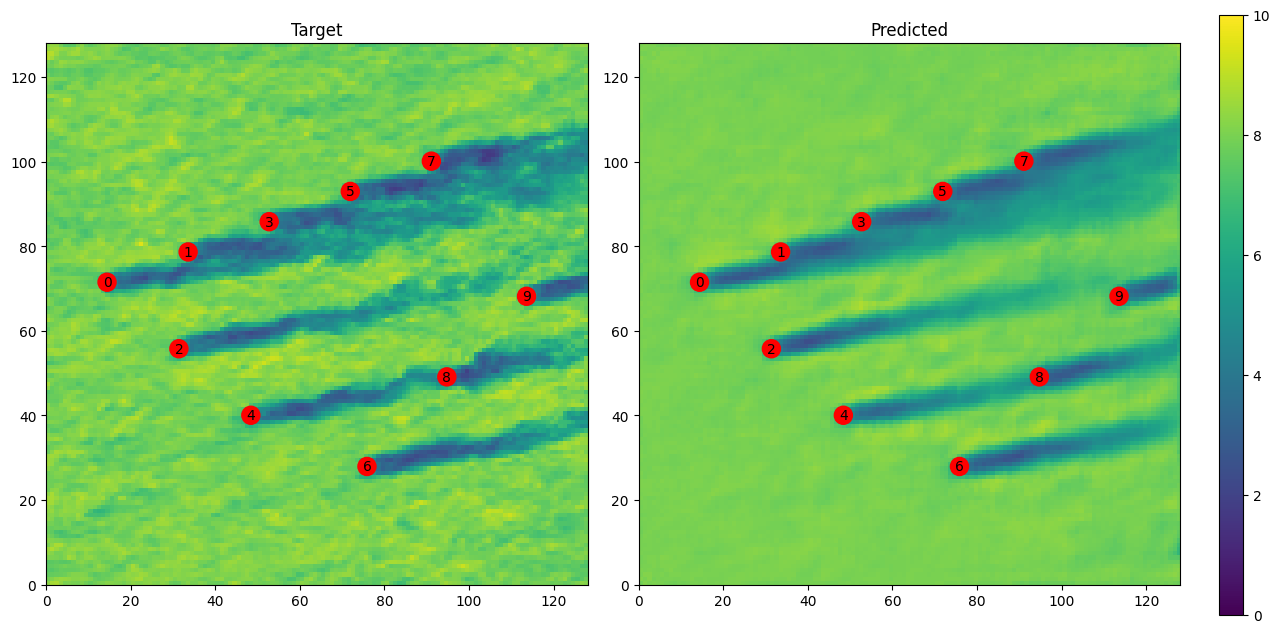

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


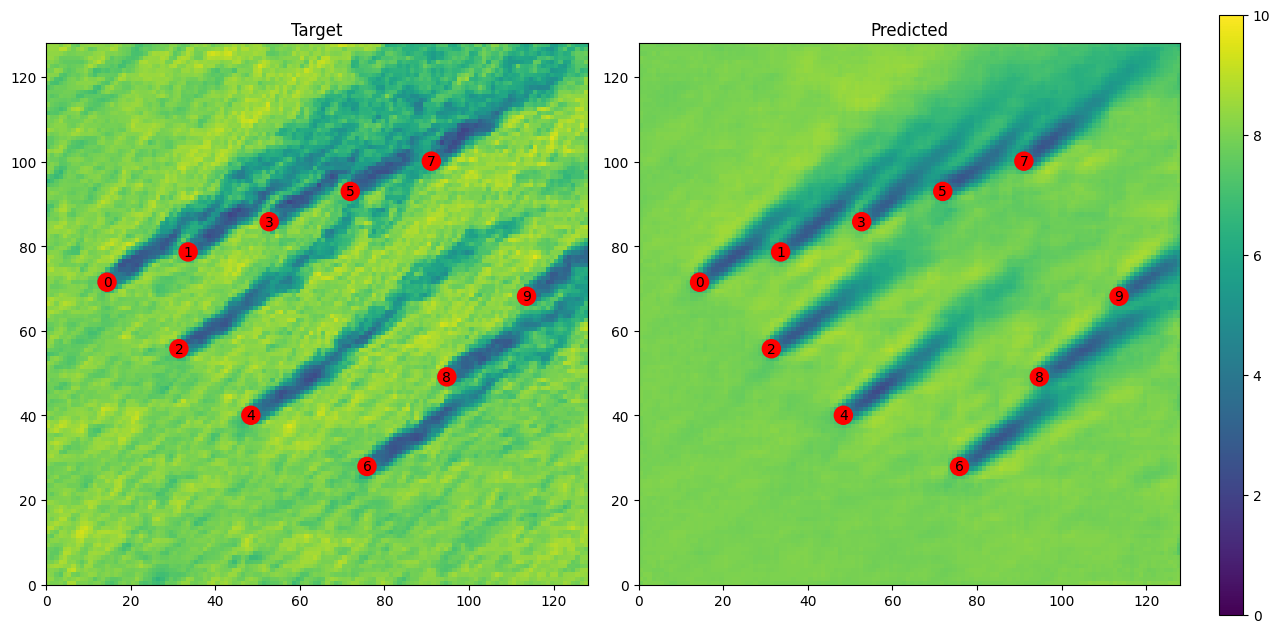

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


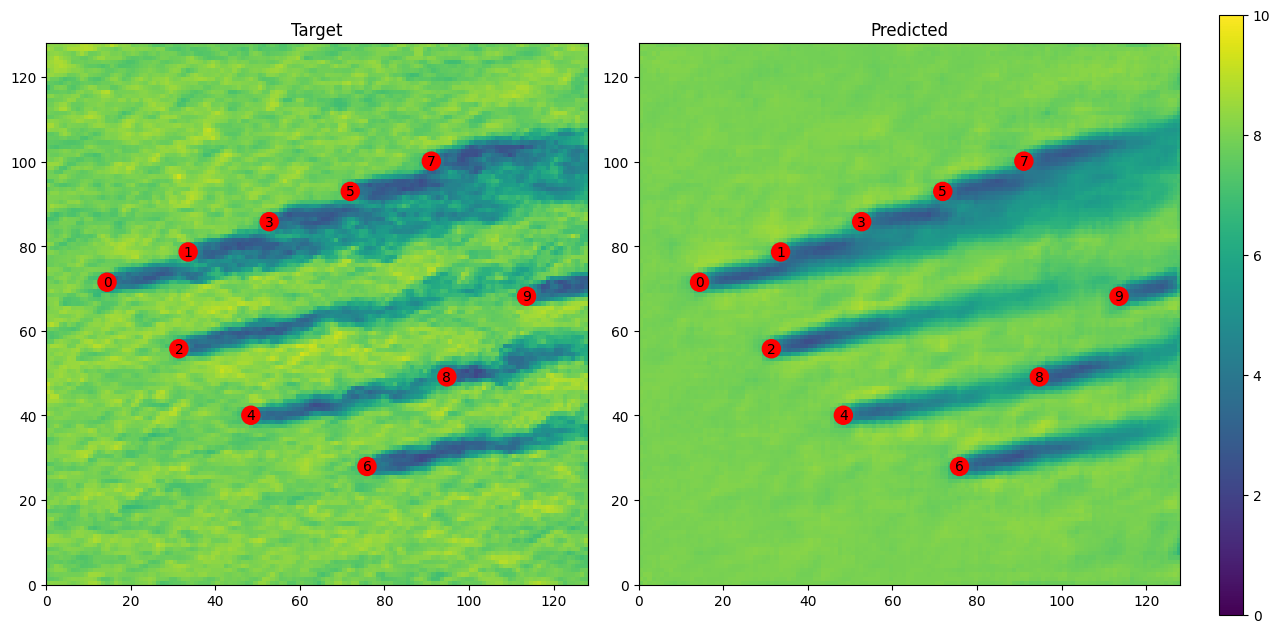

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


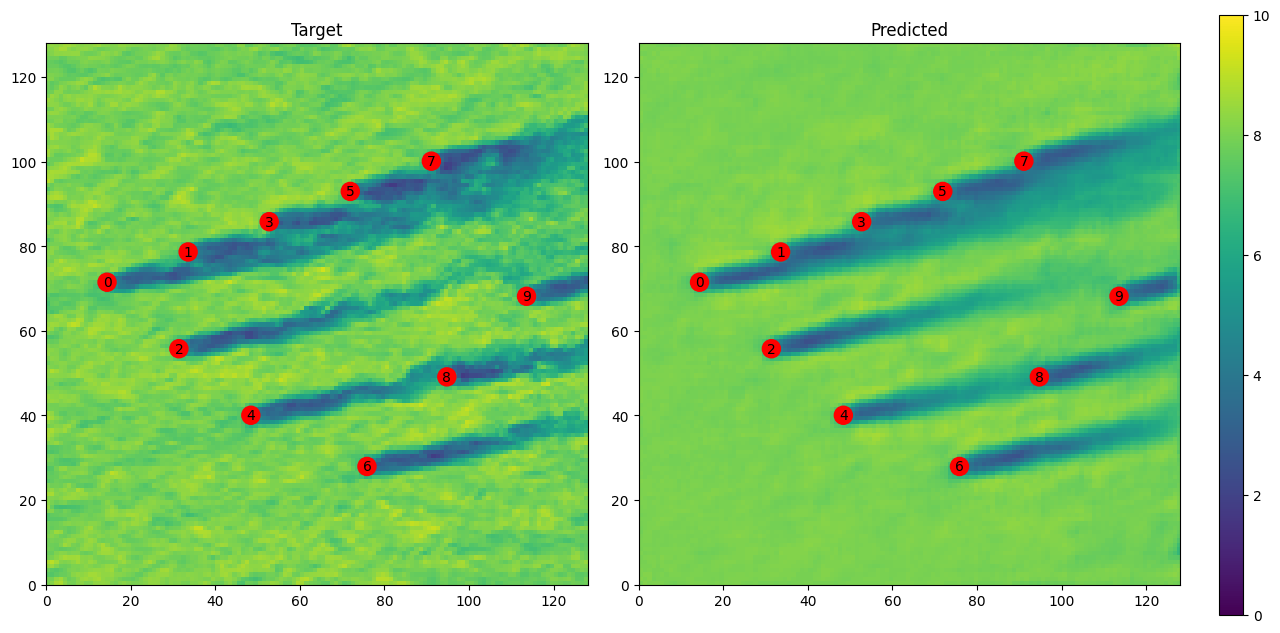

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


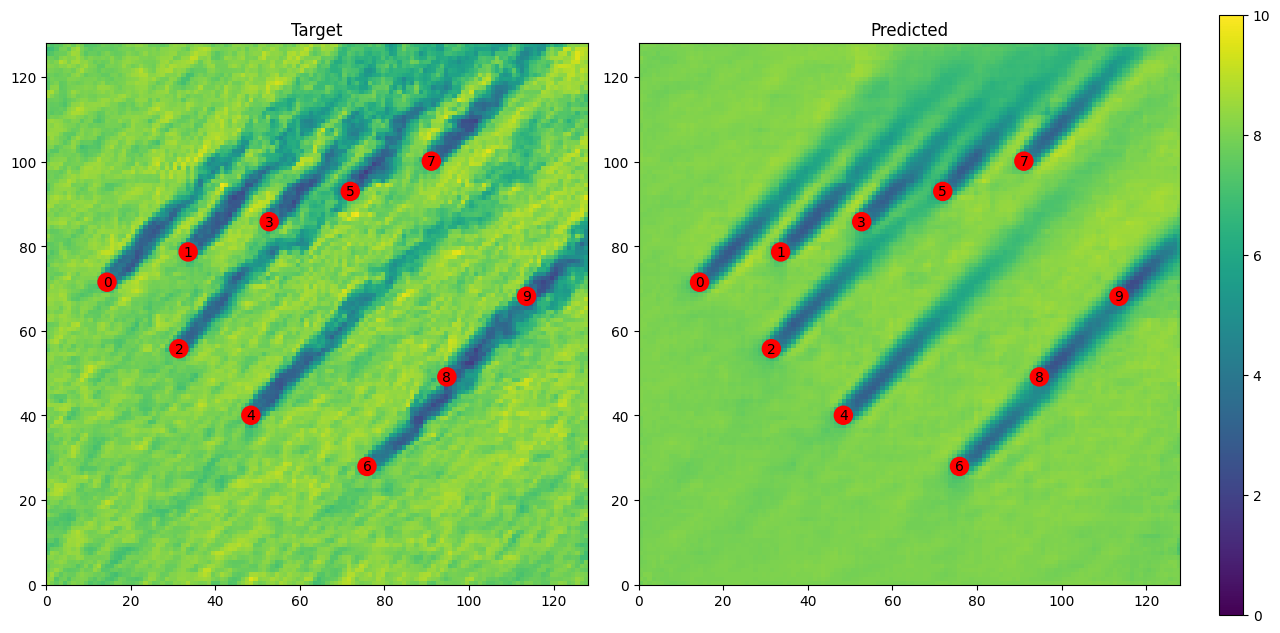

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


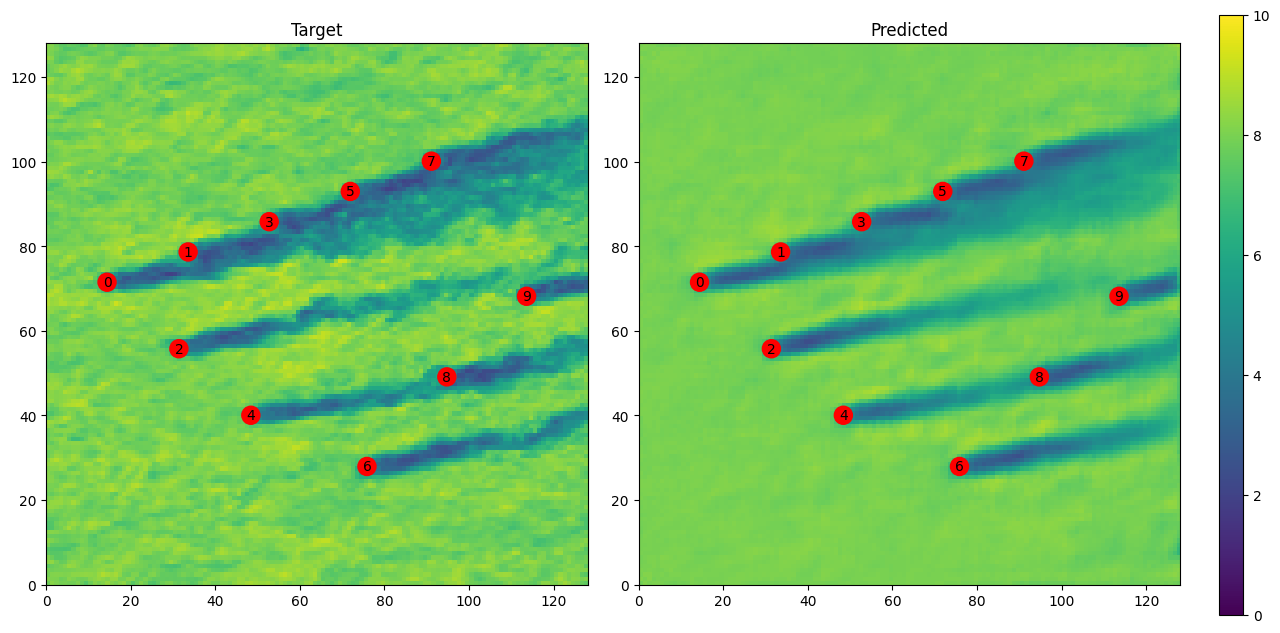

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


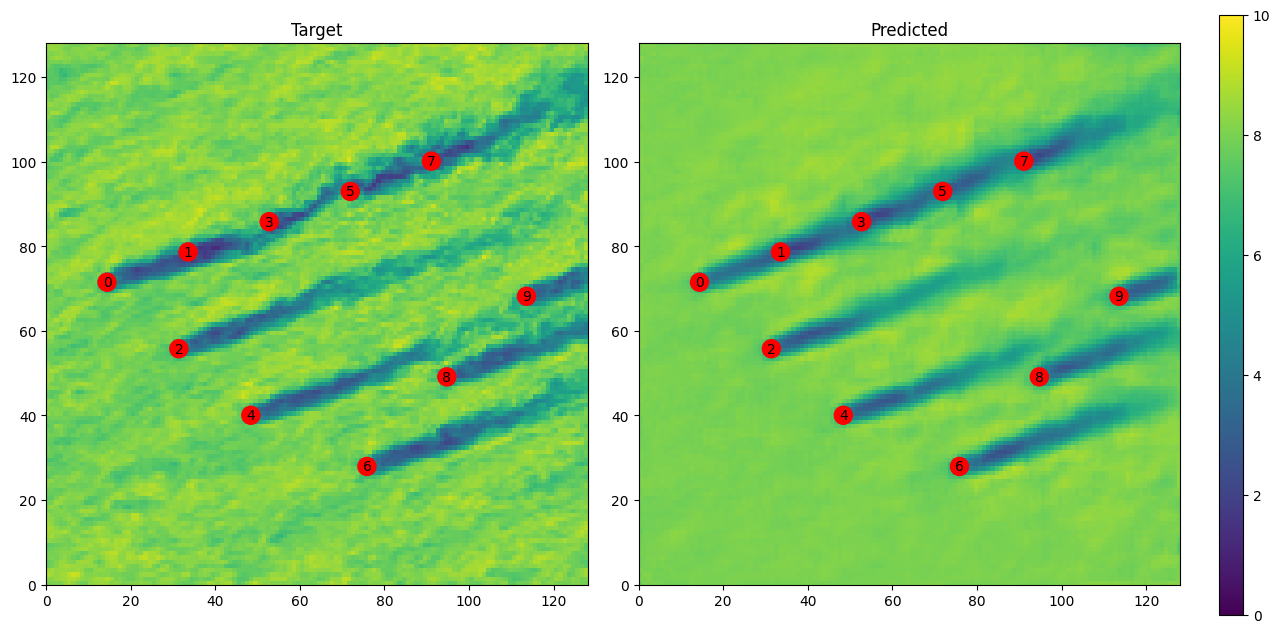

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


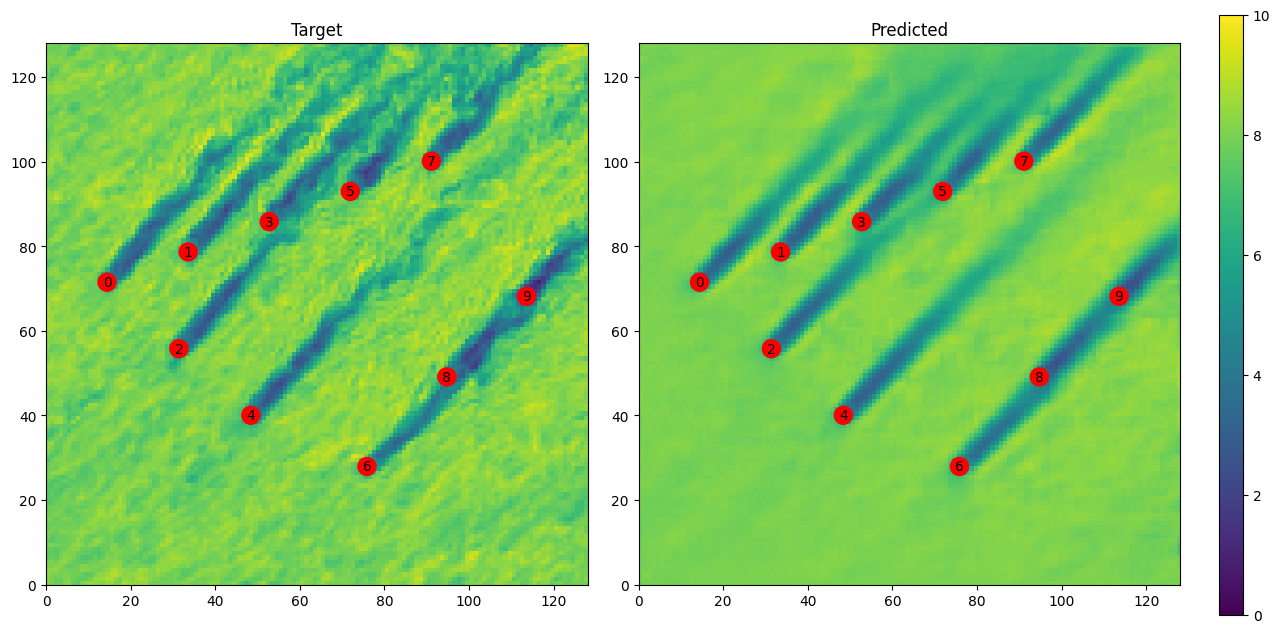

D:\AI2P\repo\utils\visualization.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


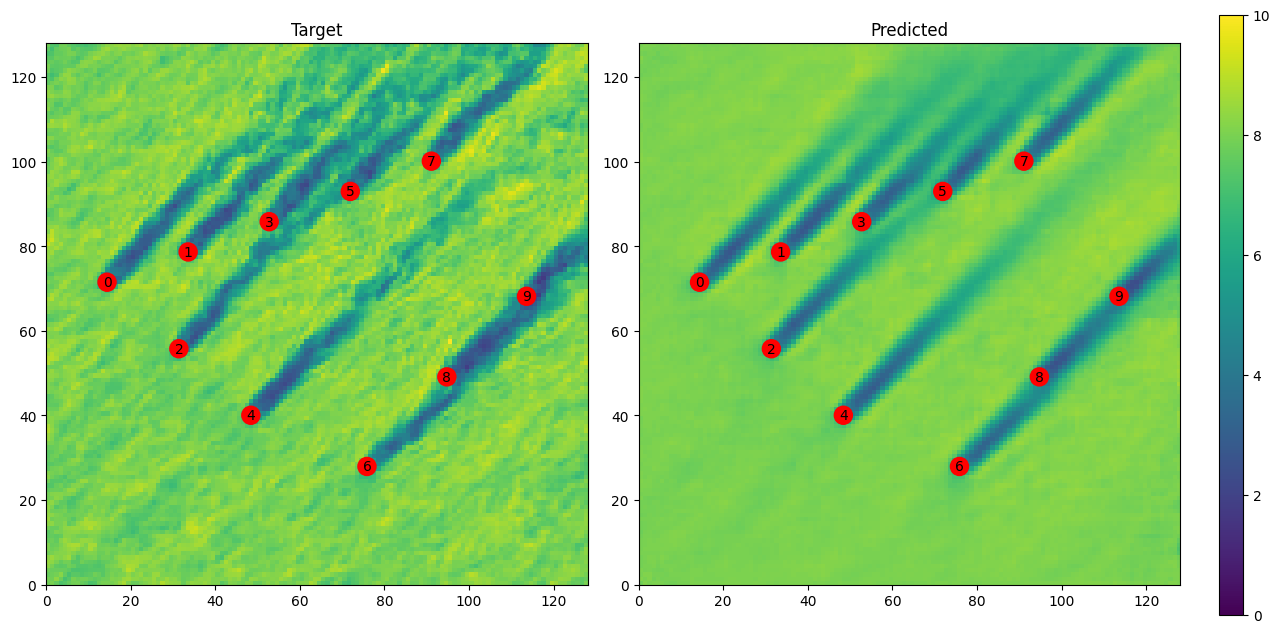

IndexError: index 32 is out of bounds for dimension 0 with size 32

In [3]:
to_plot = [
    "D:\\AI2P\\repo\\experiments\\graphs\\results\\windmaps\\20241025144902_Case01_True_pignn_deconv_90_1"
]

for experiment in to_plot:
    mse, std = evaluate_model(experiment)

In [ ]:
from architecture.windspeedLSTM.windspeedLSTM import WindSpeedLSTMDeConv, WindspeedLSTM

# Evaluation methods for temporal methods
def evaluate_temporal_model(experiment_dir):
    config_path = os.path.join(experiment_dir, 'config.json')
    model_config = get_pignn_config()
    config = load_config(config_path)
    is_direct_lstm = config['direct_lstm']

    deconv_model = DeConvNet(1, [64, 128, 256, 1], output_size=image_size) if not is_direct_lstm else None
    graph_model = FlowPIGNN(**model_config, deconv_model=deconv_model).to(device)
    graph_model_path = os.path.join(experiment_dir, 'pignn_best.pt')
    graph_model.load_state_dict(torch.load(graph_model_path))

    temporal_model = WindSpeedLSTMDeConv(seq_length, [64, 128, 256, 1], image_size).to(
        device) if is_direct_lstm else WindspeedLSTM(seq_length).to(device)
    temporal_model_path = os.path.join(experiment_dir, 'unet_lstm_best.pt')
    temporal_model.load_state_dict(torch.load(temporal_model_path))
    embedding_size = (50, 10) if is_direct_lstm else (image_size, image_size)

    dataset = get_dataset(config['dataset_dirs'], True, seq_length)
    _, _, test_loader = create_data_loaders(dataset, config['batch_size'], seq_length)
    return calculate_temporal_test_loss(test_loader, graph_model, temporal_model, embedding_size)

def calculate_temporal_test_loss(test_loader, graph_model, temporal_model, embedding_size, output_size=(128, 128), plot_examples=False):
    with torch.no_grad():
        test_losses = []
        for j, batch in enumerate(test_loader):
            generated_img = []
            target_img = []
            for i, seq in enumerate(batch[0]):
                # Process graphs in parallel at each timestep for the entire batch
                seq = seq.to(device)
                nf = torch.cat((seq.x.to(device), seq.pos.to(device)), dim=-1).float()
                ef = seq.edge_attr.to(device).float()
                gf = seq.global_feats.to(device).float()
                graph_output = graph_model(seq, nf, ef, gf).reshape(-1, embedding_size[0], embedding_size[1])
                generated_img.append(graph_output)
                target_img.append(batch[1][i].y.to(device).reshape(-1, output_size[0], output_size[1]))

            temporal_img = torch.stack(generated_img, dim=1)
            output = temporal_model(temporal_img).flatten()
            target = torch.stack(target_img, dim=1).flatten()
            test_loss = criterion(output, target)

            if plot_examples:
                plot_prediction_vs_real(output[0, seq_length - 1].cpu(), target[0, seq_length - 1].cpu(), number=j+6)
            test_losses.append(test_loss.item())
    return np.mean(test_losses), np.std(test_losses)

In [ ]:
# Evaluation for temporal methods
image_size = 128
seq_length = 50
base_dir = "results/temporal"

# Iterate through each experiment folder and load the model and config
for experiment_name in os.listdir(base_dir):
    experiment_dir = os.path.join(base_dir, experiment_name)

    if os.path.isdir(experiment_dir):
        try:
            mse, std = evaluate_temporal_model(experiment_dir)
            print(f"Loaded model from {experiment_name} has MSE on test set: {mse} +- {std}")
        except Exception as e:
            print(f"Failed to load model from {experiment_name}: {e}")